In [2]:
import pandas as pd, os, numpy as np
from tests import *
from constants import *

# import
data = pd.read_csv(os.path.join('..', 'data', 'results.csv'))

# Questions tag analysis

## Issues

In [3]:
data_issues = getInfo(data, ISSUES)

In [4]:
# unique tags
result_ai = ''
result_noai = ''
for index, row in data.iterrows():
    for column in note_columns:
        if(row.variant=='ai'):
            result_ai += str(row[column]) + ','
        else:
            result_noai += str(row[column]) + ','
pd.Series(list(filter(lambda x: x.startswith('i-'), (result_ai + result_noai).split(',')))).value_counts()

i-unwanted-sign-up                  34
i-unexpected-fees                   18
i-unwanted-marketing-consent        10
i-small-unreadable-elements          8
i-missing-sign-up-link-in-popup      8
i-bad-website-overall                6
i-buy-button-wrong-label             5
i-intrusive-popups-overall           5
i-search-problems                    4
i-unclickable-product-image          3
i-cart-notification-missing          3
i-missing-payment-methods            2
i-unexpected-pre-filled-fields       2
i-no-shipping-on-product-page        2
i-missing-checkout-link-in-popup     1
i-sort-not-found                     1
i-unnoticed-left-out-fields          1
i-default-white-tshirt               1
i-black-filter-wrong-color           1
Name: count, dtype: int64

In [5]:
pd.Series(list(filter(lambda x: x.startswith('i-'), (result_ai).split(',')))).value_counts()

i-unwanted-sign-up                  17
i-unexpected-fees                   10
i-intrusive-popups-overall           4
i-search-problems                    4
i-unwanted-marketing-consent         3
i-small-unreadable-elements          3
i-cart-notification-missing          3
i-buy-button-wrong-label             2
i-unexpected-pre-filled-fields       1
i-missing-sign-up-link-in-popup      1
i-unclickable-product-image          1
i-sort-not-found                     1
i-no-shipping-on-product-page        1
i-missing-checkout-link-in-popup     1
i-missing-payment-methods            1
i-bad-website-overall                1
Name: count, dtype: int64

In [6]:
pd.Series(list(filter(lambda x: x.startswith('i-'), (result_noai).split(',')))).value_counts()

i-unwanted-sign-up                 17
i-unexpected-fees                   8
i-missing-sign-up-link-in-popup     7
i-unwanted-marketing-consent        7
i-small-unreadable-elements         5
i-bad-website-overall               5
i-buy-button-wrong-label            3
i-unclickable-product-image         2
i-unnoticed-left-out-fields         1
i-no-shipping-on-product-page       1
i-intrusive-popups-overall          1
i-unexpected-pre-filled-fields      1
i-default-white-tshirt              1
i-black-filter-wrong-color          1
i-missing-payment-methods           1
Name: count, dtype: int64

In [7]:
data_issues['sum'] = data_issues[note_columns].sum(axis=1)
data_issues['sumBase'] = data_issues[base_note_columns].sum(axis=1)
data_issues['sumFollowup'] = data_issues[follow_up_task_columns].sum(axis=1)
data_issues['sumFollowup1'] = data_issues[follow_up_1_task_columns].sum(axis=1)
data_issues['sumFollowup2'] = data_issues[follow_up_2_task_columns].sum(axis=1)
data_issues['sumFollowup3'] = data_issues[follow_up_3_task_columns].sum(axis=1)
data_issues[[
    'variant', 'sum', 'sumBase', 'sumFollowup', 'sumFollowup1', 'sumFollowup2', 'sumFollowup3'
]].groupby('variant').agg(['mean', 'std', 'median'])


sum                    sumBase                  sumFollowup  \
             mean       std median      mean       std median        mean   
variant                                                                     
ai       1.800000  1.270352    1.5  1.266667  1.362891    1.0    0.533333   
no-ai    2.033333  1.564329    1.5  2.033333  1.564329    1.5    0.000000   

                        sumFollowup1                  sumFollowup2            \
             std median         mean       std median         mean       std   
variant                                                                        
ai       0.62881    0.0          0.3  0.534983    0.0     0.166667  0.379049   
no-ai    0.00000    0.0          0.0  0.000000    0.0     0.000000  0.000000   

               sumFollowup3                   
        median         mean       std median  
variant                                       
ai         0.0     0.066667  0.253708    0.0  
no-ai      0.0     0.000000  0.000000    0.0

In [8]:
my_mannwhitney(data_issues, ['sum', 'sumBase'], 'variant', ['no-ai', 'ai'])

,Property,U,z,p,r,significant
0,sum,473.5,0.35,0.722,0.05,False
1,sumBase,597.0,2.18,0.024,0.28,True


In [9]:
my_count(data_issues)

All notes                      115.0
All task notes                 115.0
All pre notes                    0.0
All post notes                   0.0
All base notes                  99.0
All follow-up notes             16.0
All base task notes             99.0
All follow-up task notes        16.0
First follow-up task notes       9.0
Second follow-up task notes      5.0
Third follow-up task notes       2.0
T1Q1Note                        38.0
T1Q1F1Note                       4.0
T1Q1F2Note                       1.0
T1Q1F3Note                       2.0
T1Q2Note                        14.0
T1Q2F1Note                       1.0
T1Q2F2Note                       1.0
T1Q2F3Note                       0.0
T1Q3Note                        11.0
T1Q3F1Note                       1.0
T1Q3F2Note                       0.0
T1Q3F3Note                       0.0
T2Q1Note                        16.0
T2Q1F1Note                       2.0
T2Q1F2Note                       1.0
T2Q1F3Note                       0.0
T

In [10]:
my_count(data_issues[data_issues.variant=='ai'])

All notes                      54.0
All task notes                 54.0
All pre notes                   0.0
All post notes                  0.0
All base notes                 38.0
All follow-up notes            16.0
All base task notes            38.0
All follow-up task notes       16.0
First follow-up task notes      9.0
Second follow-up task notes     5.0
Third follow-up task notes      2.0
T1Q1Note                       13.0
T1Q1F1Note                      4.0
T1Q1F2Note                      1.0
T1Q1F3Note                      2.0
T1Q2Note                        7.0
T1Q2F1Note                      1.0
T1Q2F2Note                      1.0
T1Q2F3Note                      0.0
T1Q3Note                        2.0
T1Q3F1Note                      1.0
T1Q3F2Note                      0.0
T1Q3F3Note                      0.0
T2Q1Note                        7.0
T2Q1F1Note                      2.0
T2Q1F2Note                      1.0
T2Q1F3Note                      0.0
T2Q2Note                    

In [11]:
# unique tags, only first base question
result_ai = ''
result_noai = ''
for index, row in data.iterrows():
    for column in note_columns:
        if(row.variant=='ai' and column in ['T1Q1Note', 'T2Q1Note']):
            result_ai += str(row[column]) + ','
        elif(column in ['T1Q1Note', 'T2Q1Note']):
            result_noai += str(row[column]) + ','
pd.Series(list(filter(lambda x: x.startswith('i-'), (result_ai + result_noai).split(',')))).value_counts()

i-unwanted-sign-up                 22
i-unexpected-fees                  13
i-missing-sign-up-link-in-popup     6
i-buy-button-wrong-label            3
i-search-problems                   2
i-missing-payment-methods           2
i-unclickable-product-image         2
i-cart-notification-missing         1
i-unnoticed-left-out-fields         1
i-small-unreadable-elements         1
i-default-white-tshirt              1
Name: count, dtype: int64

In [12]:
pd.Series(list(filter(lambda x: x.startswith('i-'), (result_ai).split(',')))).value_counts()

i-unwanted-sign-up             9
i-unexpected-fees              6
i-search-problems              2
i-cart-notification-missing    1
i-buy-button-wrong-label       1
i-missing-payment-methods      1
Name: count, dtype: int64

In [13]:
pd.Series(list(filter(lambda x: x.startswith('i-'), (result_noai).split(',')))).value_counts()

i-unwanted-sign-up                 13
i-unexpected-fees                   7
i-missing-sign-up-link-in-popup     6
i-unclickable-product-image         2
i-buy-button-wrong-label            2
i-unnoticed-left-out-fields         1
i-small-unreadable-elements         1
i-default-white-tshirt              1
i-missing-payment-methods           1
Name: count, dtype: int64

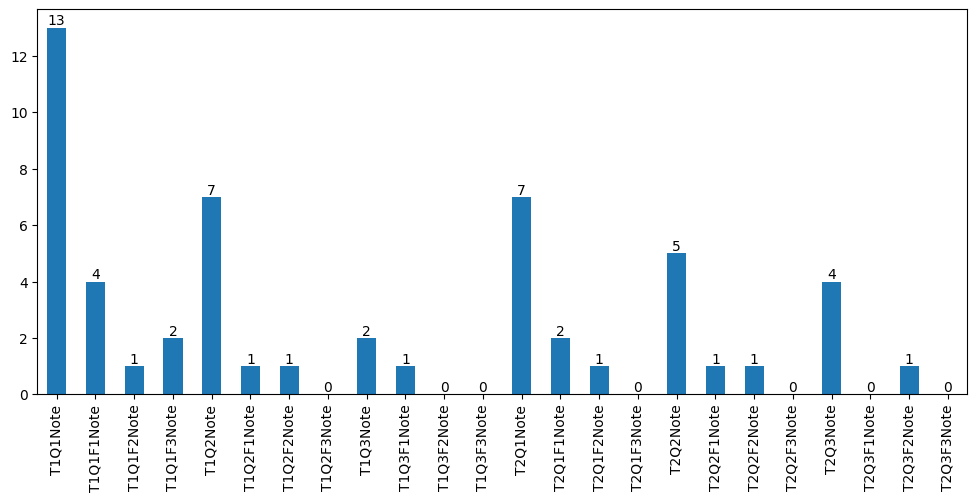

In [14]:
ax = my_count(data_issues[data_issues.variant=='ai'])[11:].plot.bar(figsize=(12,5))
_ = ax.bar_label(ax.containers[0])

In [15]:
my_count(data_issues[data_issues.variant=='no-ai'])

All notes                      61.0
All task notes                 61.0
All pre notes                   0.0
All post notes                  0.0
All base notes                 61.0
All follow-up notes             0.0
All base task notes            61.0
All follow-up task notes        0.0
First follow-up task notes      0.0
Second follow-up task notes     0.0
Third follow-up task notes      0.0
T1Q1Note                       25.0
T1Q1F1Note                      0.0
T1Q1F2Note                      0.0
T1Q1F3Note                      0.0
T1Q2Note                        7.0
T1Q2F1Note                      0.0
T1Q2F2Note                      0.0
T1Q2F3Note                      0.0
T1Q3Note                        9.0
T1Q3F1Note                      0.0
T1Q3F2Note                      0.0
T1Q3F3Note                      0.0
T2Q1Note                        9.0
T2Q1F1Note                      0.0
T2Q1F2Note                      0.0
T2Q1F3Note                      0.0
T2Q2Note                    

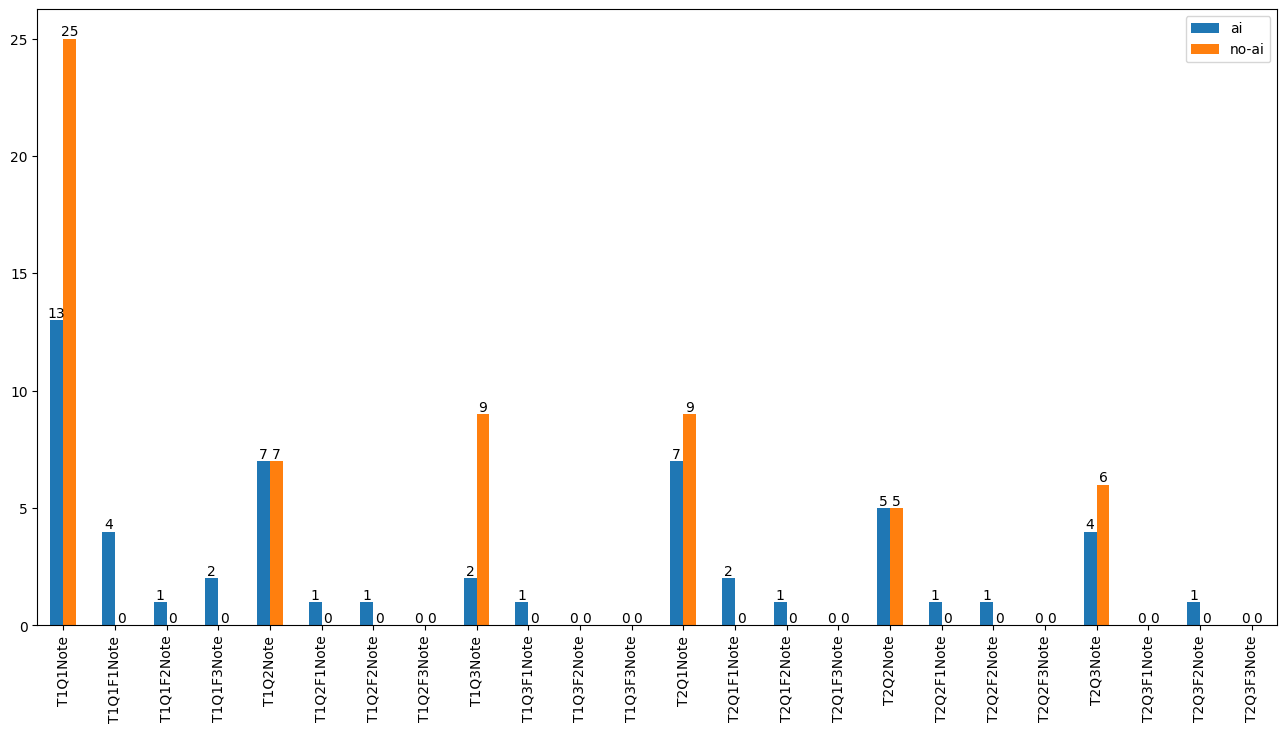

In [16]:
ax = pd.DataFrame({
    'ai' : my_count(data_issues[data_issues.variant=='ai'])[11:],
    'no-ai' : my_count(data_issues[data_issues.variant=='no-ai'])[11:]
}).plot.bar(figsize=(16,8))
_ = ax.bar_label(ax.containers[0])
_ = ax.bar_label(ax.containers[1])

In [17]:
base_ai = data_issues[data.variant=='ai'][base_task_note_columns].sum(axis=1).value_counts().sort_index()
all_ai = data_issues[data.variant=='ai'][task_note_columns].sum(axis=1).value_counts().sort_index()
all_ai.index = all_ai.index.astype(int)

base_noai = data_issues[data.variant=='no-ai'][base_task_note_columns].sum(axis=1).value_counts().sort_index()
all_noai = data_issues[data.variant=='no-ai'][task_note_columns].sum(axis=1).value_counts().sort_index()
all_noai.index = all_noai.index.astype(int)

In [18]:
my_chi([
    [all_ai[1:].sum(), all_ai[0].sum()],
    [all_noai[1:].sum(), all_noai[0].sum()]
])

pvalue: 1.0

stat = 0.0, df = 1
data
[[27, 3], [28, 2]]
expected frequencies:
[[27.5  2.5]
 [27.5  2.5]]

n=60


In [19]:
my_chi([
    [all_ai[3:].sum(), all_ai[1:3].sum(), all_ai[0].sum()],
    [all_noai[3:].sum(), all_noai[1:3].sum(), all_noai[0].sum()]
])

pvalue: 0.7883441760686487

stat = 0.4756410256410257, df = 2
data
[[7, 20, 3], [9, 19, 2]]
expected frequencies:
[[ 8.  19.5  2.5]
 [ 8.  19.5  2.5]]

n=60


In [20]:
my_chi([
    [base_ai[1:].sum(), base_ai[0].sum()],
    [base_noai[1:].sum(), base_noai[0].sum()]
])

----> pvalue: 0.023868442164574358

stat = 5.104166666666666, df = 1
data
[[20, 10], [28, 2]]
expected frequencies:
[[24.  6.]
 [24.  6.]]

n=60
Post-hoc testing:
([20, 10], [28, 2])                     0.024452075105022415                   1





In [21]:
samples = {
    'First base question (NoAI) vs. first base question + its follow-ups (AI)': [ 
        data_issues[data_issues.variant=='no-ai']['T1Q1Note'] + data_issues[data_issues.variant=='no-ai']['T2Q1Note'], 
        data_issues[data_issues.variant=='ai']['T1Q1Note'] + data_issues[data_issues.variant=='ai']['T2Q1Note'] + data_issues[data_issues.variant=='ai']['T1Q1F1Note'] + data_issues[data_issues.variant=='ai']['T1Q1F2Note'] + data_issues[data_issues.variant=='ai']['T1Q1F3Note'] + data_issues[data_issues.variant=='ai']['T2Q1F1Note'] + data_issues[data_issues.variant=='ai']['T2Q1F2Note'] + data_issues[data_issues.variant=='ai']['T2Q1F3Note']
    ],
    'All Base questions (NoAI) vs. First base question + its flowups' : [
        data_issues[data_issues.variant=='no-ai']['T1Q1Note'] + data_issues[data_issues.variant=='no-ai']['T2Q1Note'] + data_issues[data_issues.variant=='no-ai']['T1Q2Note'] + data_issues[data_issues.variant=='no-ai']['T2Q2Note'] + data_issues[data_issues.variant=='no-ai']['T1Q3Note'] + data_issues[data_issues.variant=='no-ai']['T2Q3Note'], 
        data_issues[data_issues.variant=='ai']['T1Q1Note'] + data_issues[data_issues.variant=='ai']['T2Q1Note'] + data_issues[data_issues.variant=='ai']['T1Q1F1Note'] + data_issues[data_issues.variant=='ai']['T1Q1F2Note'] + data_issues[data_issues.variant=='ai']['T1Q1F3Note'] + data_issues[data_issues.variant=='ai']['T2Q1F1Note'] + data_issues[data_issues.variant=='ai']['T2Q1F2Note'] + data_issues[data_issues.variant=='ai']['T2Q1F3Note']
    ],
    'First base question (NoAI) vs. first base question (AI)': [ 
        data_issues[data_issues.variant=='no-ai']['T1Q1Note'] + data_issues[data_issues.variant=='no-ai']['T2Q1Note'], 
        data_issues[data_issues.variant=='ai']['T1Q1Note'] + data_issues[data_issues.variant=='ai']['T2Q1Note'],
    ],
    'All Base questions (NoAI) vs. All base questions (AI)' : [
        data_issues[data_issues.variant=='no-ai']['T1Q1Note'] + data_issues[data_issues.variant=='no-ai']['T2Q1Note'] + data_issues[data_issues.variant=='no-ai']['T1Q2Note'] + data_issues[data_issues.variant=='no-ai']['T2Q2Note'] + data_issues[data_issues.variant=='no-ai']['T1Q3Note'] + data_issues[data_issues.variant=='no-ai']['T2Q3Note'], 
        data_issues[data_issues.variant=='ai']['T1Q1Note'] + data_issues[data_issues.variant=='ai']['T2Q1Note'] + data_issues[data_issues.variant=='ai']['T1Q2Note'] + data_issues[data_issues.variant=='ai']['T2Q2Note'] + data_issues[data_issues.variant=='ai']['T1Q3Note'] + data_issues[data_issues.variant=='ai']['T2Q3Note'],
    ],
}

for item in samples:
    print(item)
    x = samples[item][0]
    y = samples[item][1]
    print(my_mannwhitney_lite(x,y), end='\n\n')
    print(x.agg(['mean', 'std', 'sum']), end='\n\n')
    print(y.agg(['mean', 'std', 'sum']), end='\n\n\n')

First base question (NoAI) vs. first base question + its follow-ups (AI)
       U     z      p     r  significant
0  485.5  0.53  0.585  0.07        False

mean     1.133333
std      0.973204
sum     34.000000
dtype: float64

mean     1.000000
std      0.982607
sum     30.000000
dtype: float64


All Base questions (NoAI) vs. First base question + its flowups
       U     z      p     r  significant
0  633.5  2.72  0.005  0.35         True

mean     2.033333
std      1.564329
sum     61.000000
dtype: float64

mean     1.000000
std      0.982607
sum     30.000000
dtype: float64


First base question (NoAI) vs. first base question (AI)
       U     z     p     r  significant
0  588.0  2.05  0.03  0.26         True

mean     1.133333
std      0.973204
sum     34.000000
dtype: float64

mean     0.666667
std      0.922266
sum     20.000000
dtype: float64


All Base questions (NoAI) vs. All base questions (AI)
       U     z      p     r  significant
0  597.0  2.18  0.024  0.28         True



In [22]:
chisquare([31, 19])

Power_divergenceResult(statistic=2.88, pvalue=0.08968602177036435)

In [23]:
chisquare([58, 37])

Power_divergenceResult(statistic=4.6421052631578945, pvalue=0.031196709732933862)

## Informativeness

In [24]:
data_info = getInfo(data, INFO)

In [25]:
for index, row in my_count(data_info, [0, 1, 2, 3]).items():
    print("{:30}{:20}{}".format(index, str(row), ((np.array(row).sum() - row[0]) / np.array(row).sum() * 100) if np.array(row).sum() > 0 else 0))

All notes                     [591, 213, 261, 285]56.222222222222214
All task notes                [445, 179, 180, 96] 50.55555555555556
All pre notes                 [18, 33, 67, 182]   94.0
All post notes                [128, 1, 14, 7]     14.666666666666666
All base notes                [201, 52, 97, 190]  62.77777777777778
All follow-up notes           [390, 161, 164, 95] 51.85185185185185
All base task notes           [153, 51, 76, 80]   57.49999999999999
All follow-up task notes      [292, 128, 104, 16] 45.925925925925924
First follow-up task notes    [87, 38, 45, 10]    51.66666666666667
Second follow-up task notes   [104, 45, 27, 4]    42.22222222222222
Third follow-up task notes    [101, 45, 32, 2]    43.888888888888886
T1Q1Note                      [0, 8, 22, 30]      100.0
T1Q1F1Note                    [7, 8, 10, 5]       76.66666666666667
T1Q1F2Note                    [12, 8, 9, 1]       60.0
T1Q1F3Note                    [7, 15, 6, 2]       76.66666666666667
T1Q2Note      

In [26]:
for index, row in my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3]).items():
    print("{:30}{:20}{}".format(index, str(row), ((np.array(row).sum() - row[0]) / np.array(row).sum() * 100) if np.array(row).sum() > 0 else 0))

All notes                     [489, 191, 211, 189]54.72222222222223
All task notes                [371, 157, 140, 52] 48.47222222222222
All pre notes                 [18, 33, 59, 130]   92.5
All post notes                [100, 1, 12, 7]     16.666666666666664
All base notes                [99, 30, 47, 94]    63.33333333333333
All follow-up notes           [390, 161, 164, 95] 51.85185185185185
All base task notes           [79, 29, 36, 36]    56.111111111111114
All follow-up task notes      [292, 128, 104, 16] 45.925925925925924
First follow-up task notes    [87, 38, 45, 10]    51.66666666666667
Second follow-up task notes   [104, 45, 27, 4]    42.22222222222222
Third follow-up task notes    [101, 45, 32, 2]    43.888888888888886
T1Q1Note                      [0, 6, 11, 13]      100.0
T1Q1F1Note                    [7, 8, 10, 5]       76.66666666666667
T1Q1F2Note                    [12, 8, 9, 1]       60.0
T1Q1F3Note                    [7, 15, 6, 2]       76.66666666666667
T1Q2Note      

In [27]:
my_chi([
    [79, 29, 36, 36],
    [87, 38, 45, 10],
    [104, 45, 27, 4],
    [101, 45, 32, 2]
])

----> pvalue: 1.066126719994354e-11

stat = 70.78904083538143, df = 9
data
[[79, 29, 36, 36], [87, 38, 45, 10], [104, 45, 27, 4], [101, 45, 32, 2]]
expected frequencies:
[[92.75 39.25 35.   13.  ]
 [92.75 39.25 35.   13.  ]
 [92.75 39.25 35.   13.  ]
 [92.75 39.25 35.   13.  ]]

n=720
Post-hoc testing:
([79, 29, 36, 36], [87, 38, 45, 10])    0.0008218058730800724                   1
([79, 29, 36, 36], [104, 45, 27, 4])    5.564502672745646e-07                   1
([79, 29, 36, 36], [101, 45, 32, 2])    3.0363914420547437e-07                   1
([87, 38, 45, 10], [104, 45, 27, 4])    0.020854628057057064                   1
([87, 38, 45, 10], [101, 45, 32, 2])    0.020854628057057064                   1
([104, 45, 27, 4], [101, 45, 32, 2])       0.554214719081282                   0





In [28]:
for index, row in my_count(data_info[data_info.variant=='no-ai'], [0, 1, 2, 3]).items():
    print("{:30}{:20}{}".format(index, str(row), ((np.array(row).sum() - row[0]) / np.array(row).sum() * 100) if np.array(row).sum() > 0 else 0))

All notes                     [102, 22, 50, 96]   62.22222222222222
All task notes                [74, 22, 40, 44]    58.88888888888889
All pre notes                 [0, 0, 8, 52]       100.0
All post notes                [28, 0, 2, 0]       6.666666666666667
All base notes                [102, 22, 50, 96]   62.22222222222222
All follow-up notes           [0, 0, 0, 0]        0
All base task notes           [74, 22, 40, 44]    58.88888888888889
All follow-up task notes      [0, 0, 0, 0]        0
First follow-up task notes    [0, 0, 0, 0]        0
Second follow-up task notes   [0, 0, 0, 0]        0
Third follow-up task notes    [0, 0, 0, 0]        0
T1Q1Note                      [0, 2, 11, 17]      100.0
T1Q1F1Note                    [0, 0, 0, 0]        0
T1Q1F2Note                    [0, 0, 0, 0]        0
T1Q1F3Note                    [0, 0, 0, 0]        0
T1Q2Note                      [15, 5, 7, 3]       50.0
T1Q2F1Note                    [0, 0, 0, 0]        0
T1Q2F2Note               

In [29]:
my_chi([
    [79, 29, 36, 36],
    [74, 22, 40, 44]
])

pvalue: 0.5449228085229585

stat = 2.1347093223254214, df = 3
data
[[79, 29, 36, 36], [74, 22, 40, 44]]
expected frequencies:
[[76.5 25.5 38.  40. ]
 [76.5 25.5 38.  40. ]]

n=360


<Axes: >

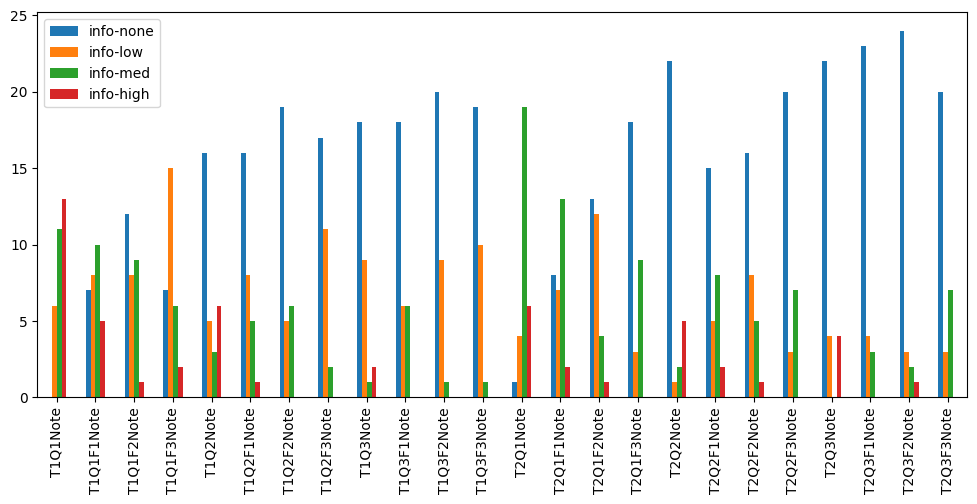

In [30]:
pd.DataFrame({
    'info-none' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[0]),
    'info-low' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[1]),
    'info-med' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[2]),
    'info-high' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[3]),
}).plot.bar(figsize=(12,5))

<Axes: >

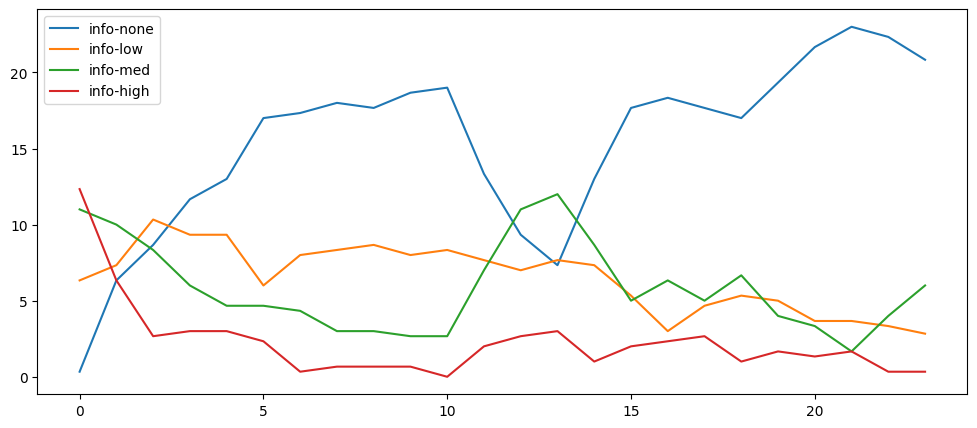

In [31]:
from scipy.signal import savgol_filter
pd.DataFrame({
    'info-none' : savgol_filter(my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[0]), 3, 1),
    'info-low' : savgol_filter(my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[1]), 3, 1),
    'info-med' : savgol_filter(my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[2]), 3, 1),
    'info-high' : savgol_filter(my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[11:].map(lambda x: x[3]), 3, 1),
}).plot.line(figsize=(12,5))

<Axes: >

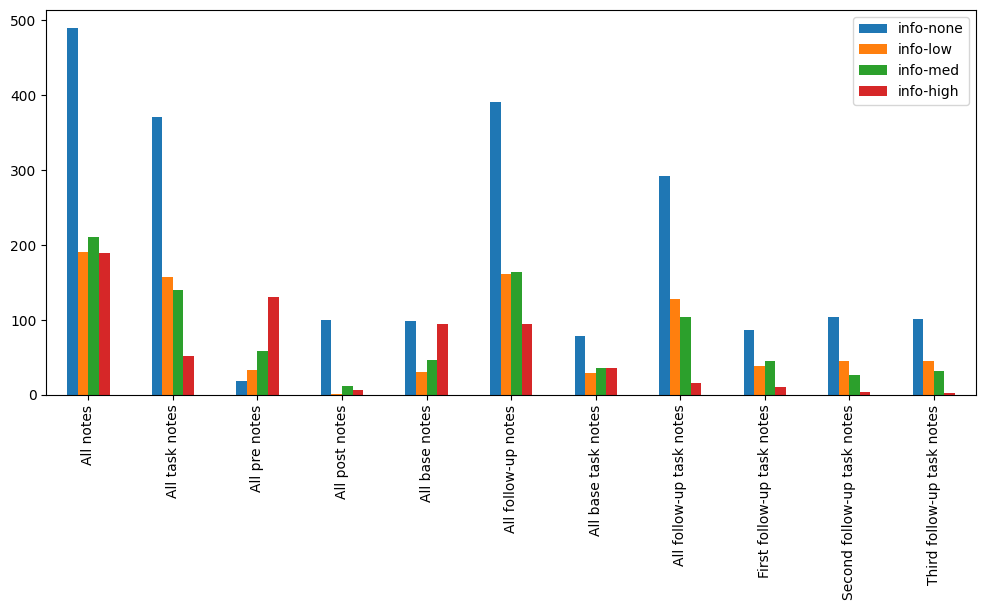

In [32]:
pd.DataFrame({
    'info-none' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[:11].map(lambda x: x[0]),
    'info-low' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[:11].map(lambda x: x[1]),
    'info-med' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[:11].map(lambda x: x[2]),
    'info-high' : my_count(data_info[data_info.variant=='ai'], [0, 1, 2, 3])[:11].map(lambda x: x[3]),
}).plot.bar(figsize=(12,5))

In [33]:
data_info['meanBase'] = data_info[base_note_columns].mean(axis=1)
data_info['meanBaseTask'] = data_info[base_task_note_columns].mean(axis=1)
data_info['meanBasePre'] = data_info[['pre1Note', 'pre2Note']].mean(axis=1)
data_info['meanBasePost'] = data_info[['post1Note']].mean(axis=1)
data_info[['variant', 'meanBase', 'meanBaseTask', 'meanBasePre', 'meanBasePost']].groupby('variant').agg(['mean', 'std'])

meanBase           meanBaseTask           meanBasePre            \
             mean       std         mean       std        mean       std   
variant                                                                    
ai       1.503704  0.445146     1.161111  0.564742    2.866667  0.224888   
no-ai    1.518519  0.333120     1.300000  0.488174    2.866667  0.224888   

        meanBasePost            
                mean       std  
variant                         
ai          0.833333  1.261727  
no-ai       0.133333  0.507416

In [34]:
my_mannwhitney(data_info, ['meanBase', 'meanBaseTask','meanBasePre', 'meanBasePost'], 'variant', ['no-ai', 'ai'])

,Property,U,z,p,r,significant
0,meanBase,465.0,0.23,0.829,0.03,False
1,meanBaseTask,520.0,1.04,0.301,0.13,False
2,meanBasePre,450.0,0.01,1.0,0.00,False
3,meanBasePost,325.0,-1.84,0.008,-0.24,True


In [35]:
pd.concat([data_info[data_info.variant=='no-ai']['T1Q1Note'],data_info[data_info.variant=='no-ai']['T2Q1Note']]).value_counts().sort_index()

1     4
2    31
3    25
Name: count, dtype: int64

In [36]:
pd.concat([
    data_info[data_info.variant=='ai']['T1Q1Note'], data_info[data_info.variant=='ai']['T2Q1Note'], data_info[data_info.variant=='ai']['T1Q1F1Note'], data_info[data_info.variant=='ai']['T1Q1F2Note'], data_info[data_info.variant=='ai']['T1Q1F3Note'], data_info[data_info.variant=='ai']['T2Q1F1Note'], data_info[data_info.variant=='ai']['T2Q1F2Note'], data_info[data_info.variant=='ai']['T2Q1F3Note']
]).value_counts().sort_index()

0.0    66
1.0    63
2.0    81
3.0    30
Name: count, dtype: int64

In [37]:
pd.concat([
    data_info[data_info.variant=='no-ai']['T1Q1Note'], data_info[data_info.variant=='no-ai']['T2Q1Note'], data_info[data_info.variant=='no-ai']['T1Q2Note'], data_info[data_info.variant=='no-ai']['T2Q2Note'], data_info[data_info.variant=='no-ai']['T1Q3Note'], data_info[data_info.variant=='no-ai']['T2Q3Note']
]).value_counts().sort_index()

0    74
1    22
2    40
3    44
Name: count, dtype: int64

In [38]:
my_chi([
    [0, 5, 30, 25],
    [66, 63, 81, 30]
])

----> pvalue: 1.306891085867766e-10

stat = 48.99619706605, df = 3
data
[[0, 5, 30, 25], [66, 63, 81, 30]]
expected frequencies:
[[13.2 13.6 22.2 11. ]
 [52.8 54.4 88.8 44. ]]

n=300
Post-hoc testing:
([0, 5, 30, 25], [66, 63, 81, 30])      1.3068910860385626e-10                   1





In [39]:
my_chi([
    [74, 23, 39, 44],
    [66, 63, 81, 30]
])

----> pvalue: 2.9660931534845205e-06

stat = 28.418993557510998, df = 3
data
[[74, 23, 39, 44], [66, 63, 81, 30]]
expected frequencies:
[[60.         36.85714286 51.42857143 31.71428571]
 [80.         49.14285714 68.57142857 42.28571429]]

n=420
Post-hoc testing:
([74, 23, 39, 44], [66, 63, 81, 30])    2.9661019512192107e-06                   1





In [48]:
for col in data_info[data_info.variant=='no-ai'][pre_note_columns].columns:
    print(data_info[data_info.variant=='no-ai'][pre_note_columns][col].value_counts())

pre1Note
3    29
2     1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
pre2Note
3    23
2     7
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [47]:
for col in data_info[data_info.variant=='ai'][pre_note_columns].columns:
    print(data_info[data_info.variant=='ai'][pre_note_columns][col].value_counts())

pre1Note
3    30
Name: count, dtype: int64
pre1F1Note
3.0    24
2.0     6
Name: count, dtype: int64
pre1F2Note
3.0    12
1.0     9
2.0     8
0.0     1
Name: count, dtype: int64
pre1F3Note
2.0    11
1.0    10
0.0     5
3.0     4
Name: count, dtype: int64
pre2Note
3    22
2     8
Name: count, dtype: int64
pre2F1Note
3.0    16
2.0     9
0.0     3
1.0     2
Name: count, dtype: int64
pre2F2Note
3.0    13
2.0     7
1.0     6
0.0     4
Name: count, dtype: int64
pre2F3Note
2.0    10
3.0     9
1.0     6
0.0     5
Name: count, dtype: int64


## Repeats

In [39]:
data_repeat =  getInfo(data, REPEAT_NOINFO)

In [40]:
my_count(data_repeat[data_repeat.variant=='ai'])

All notes                      213
All task notes                 194
All pre notes                   12
All post notes                   7
All base notes                  30
All follow-up notes            183
All base task notes             30
All follow-up task notes       164
First follow-up task notes      57
Second follow-up task notes     60
Third follow-up task notes      47
T1Q1Note                         0
T1Q1F1Note                       5
T1Q1F2Note                       8
T1Q1F3Note                       6
T1Q2Note                         9
T1Q2F1Note                      12
T1Q2F2Note                      12
T1Q2F3Note                      10
T1Q3Note                         7
T1Q3F1Note                      13
T1Q3F2Note                      11
T1Q3F3Note                      10
T2Q1Note                         1
T2Q1F1Note                       7
T2Q1F2Note                       7
T2Q1F3Note                       5
T2Q2Note                         5
T2Q2F1Note          

In [41]:
my_count(data_repeat[data_repeat.variant=='no-ai'])

All notes                      34
All task notes                 33
All pre notes                   0
All post notes                  1
All base notes                 34
All follow-up notes             0
All base task notes            33
All follow-up task notes        0
First follow-up task notes      0
Second follow-up task notes     0
Third follow-up task notes      0
T1Q1Note                        0
T1Q1F1Note                      0
T1Q1F2Note                      0
T1Q1F3Note                      0
T1Q2Note                       13
T1Q2F1Note                      0
T1Q2F2Note                      0
T1Q2F3Note                      0
T1Q3Note                       10
T1Q3F1Note                      0
T1Q3F2Note                      0
T1Q3F3Note                      0
T2Q1Note                        0
T2Q1F1Note                      0
T2Q1F2Note                      0
T2Q1F3Note                      0
T2Q2Note                        3
T2Q2F1Note                      0
T2Q2F2Note    

In [42]:
data_repeat['meanBase'] = data_repeat[base_note_columns].sum(axis=1)
data_info[['variant', 'meanBase']].groupby('variant').agg(['mean', 'std'])

meanBase          
             mean       std
variant                    
ai       1.503704  0.445146
no-ai    1.518519  0.333120

In [43]:
my_mannwhitney(data_repeat, ['meanBase'], 'variant', ['no-ai', 'ai'])

,Property,U,z,p,r,significant
0,meanBase,549.0,1.47,0.118,0.19,False


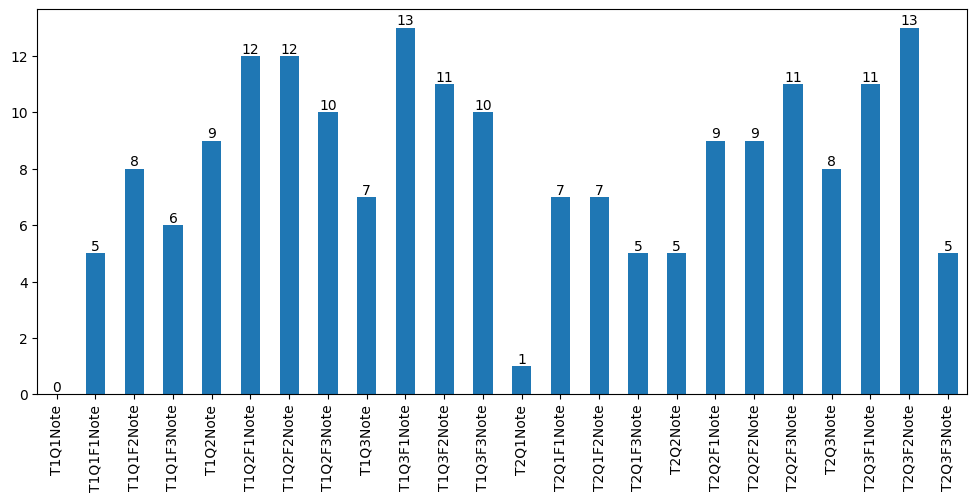

In [44]:
ax = my_count(data_repeat[data_repeat.variant=='ai'])[11:].plot.bar(figsize=(12,5))
_ = ax.bar_label(ax.containers[0])

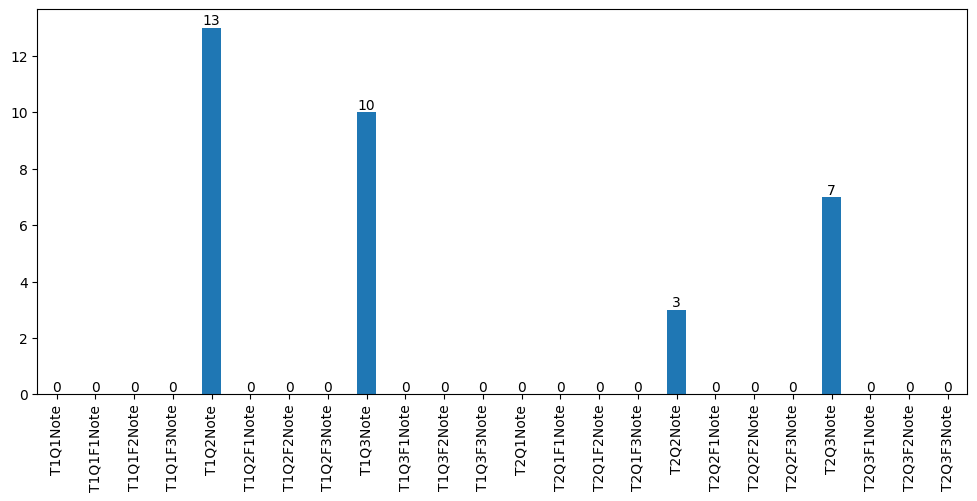

In [45]:
ax = my_count(data_repeat[data_repeat.variant=='no-ai'])[11:].plot.bar(figsize=(12,5))
_ = ax.bar_label(ax.containers[0])

In [46]:
data_repeat =  getInfo(data, REPEAT_NOINFO_CROSS)

In [47]:
my_count(data_repeat[data_repeat.variant=='ai'])

All notes                      62
All task notes                 60
All pre notes                   0
All post notes                  2
All base notes                 30
All follow-up notes            32
All base task notes            30
All follow-up task notes       30
First follow-up task notes     17
Second follow-up task notes     9
Third follow-up task notes      4
T1Q1Note                        0
T1Q1F1Note                      0
T1Q1F2Note                      0
T1Q1F3Note                      0
T1Q2Note                        9
T1Q2F1Note                      3
T1Q2F2Note                      3
T1Q2F3Note                      2
T1Q3Note                        7
T1Q3F1Note                      4
T1Q3F2Note                      1
T1Q3F3Note                      1
T2Q1Note                        1
T2Q1F1Note                      0
T2Q1F2Note                      0
T2Q1F3Note                      0
T2Q2Note                        5
T2Q2F1Note                      4
T2Q2F2Note    

In [48]:
my_count(data_repeat[data_repeat.variant=='no-ai'])

All notes                      34
All task notes                 33
All pre notes                   0
All post notes                  1
All base notes                 34
All follow-up notes             0
All base task notes            33
All follow-up task notes        0
First follow-up task notes      0
Second follow-up task notes     0
Third follow-up task notes      0
T1Q1Note                        0
T1Q1F1Note                      0
T1Q1F2Note                      0
T1Q1F3Note                      0
T1Q2Note                       13
T1Q2F1Note                      0
T1Q2F2Note                      0
T1Q2F3Note                      0
T1Q3Note                       10
T1Q3F1Note                      0
T1Q3F2Note                      0
T1Q3F3Note                      0
T2Q1Note                        0
T2Q1F1Note                      0
T2Q1F2Note                      0
T2Q1F3Note                      0
T2Q2Note                        3
T2Q2F1Note                      0
T2Q2F2Note    

In [49]:
data_repeat =  getInfo(data, REPEAT_NOINFO_FOLLOW)

In [50]:
my_count(data_repeat[data_repeat.variant=='ai'])

All notes                      151
All task notes                 134
All pre notes                   12
All post notes                   5
All base notes                   0
All follow-up notes            151
All base task notes              0
All follow-up task notes       134
First follow-up task notes      40
Second follow-up task notes     51
Third follow-up task notes      43
T1Q1Note                         0
T1Q1F1Note                       5
T1Q1F2Note                       8
T1Q1F3Note                       6
T1Q2Note                         0
T1Q2F1Note                       9
T1Q2F2Note                       9
T1Q2F3Note                       8
T1Q3Note                         0
T1Q3F1Note                       9
T1Q3F2Note                      10
T1Q3F3Note                       9
T2Q1Note                         0
T2Q1F1Note                       7
T2Q1F2Note                       7
T2Q1F3Note                       5
T2Q2Note                         0
T2Q2F1Note          

## Skips

In [51]:
data_skip = getInfo(data, SKIP)

In [52]:
my_count(data_skip[data_skip.variant=='ai'])

All notes                      21
All task notes                 19
All pre notes                   0
All post notes                  2
All base notes                  1
All follow-up notes            20
All base task notes             1
All follow-up task notes       18
First follow-up task notes      8
Second follow-up task notes     7
Third follow-up task notes      3
T1Q1Note                        0
T1Q1F1Note                      0
T1Q1F2Note                      0
T1Q1F3Note                      0
T1Q2Note                        0
T1Q2F1Note                      2
T1Q2F2Note                      0
T1Q2F3Note                      0
T1Q3Note                        1
T1Q3F1Note                      1
T1Q3F2Note                      1
T1Q3F3Note                      0
T2Q1Note                        0
T2Q1F1Note                      0
T2Q1F2Note                      2
T2Q1F3Note                      1
T2Q2Note                        0
T2Q2F1Note                      2
T2Q2F2Note    

In [53]:
data_skip['base'] = data_skip[base_note_columns].sum(axis=1)
data_skip['followup1'] = data_skip[follow_up_1_columns].sum(axis=1)
data_skip['followup2'] = data_skip[follow_up_2_columns].sum(axis=1)
data_skip['followup3'] = data_skip[follow_up_3_columns].sum(axis=1)
data_skip[['variant', 'base', 'followup1', 'followup2', 'followup3']].groupby('variant').agg(['mean', 'std'])

base           followup1           followup2          followup3  \
             mean       std      mean       std      mean      std      mean   
variant                                                                        
ai       0.033333  0.182574  0.266667  0.827682  0.266667  0.52083  0.133333   
no-ai    0.000000  0.000000       0.0  0.000000       0.0  0.00000       0.0   

                   
              std  
variant            
ai       0.434172  
no-ai    0.000000

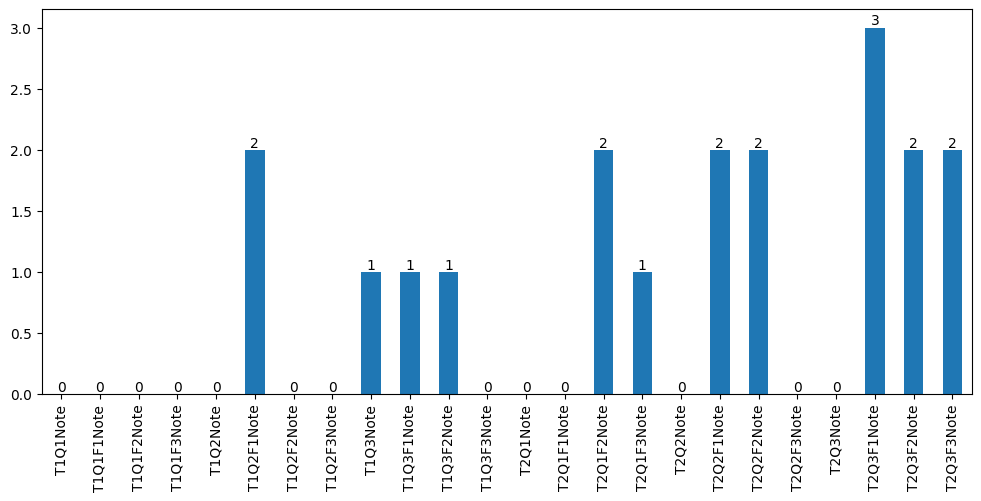

In [54]:
ax = my_count(data_skip[data_skip.variant=='ai'])[11:].plot.bar(figsize=(12,5))
_ = ax.bar_label(ax.containers[0])

In [55]:
data_skip = getInfo(data, SKIP_NOQUESTION)

In [56]:
my_count(data_skip[data_skip.variant=='ai'])

All notes                      156
All task notes                  83
All pre notes                    0
All post notes                  73
All base notes                   3
All follow-up notes            153
All base task notes              1
All follow-up task notes        82
First follow-up task notes      15
Second follow-up task notes     29
Third follow-up task notes      38
T1Q1Note                         0
T1Q1F1Note                       0
T1Q1F2Note                       1
T1Q1F3Note                       1
T1Q2Note                         0
T1Q2F1Note                       4
T1Q2F2Note                       6
T1Q2F3Note                       6
T1Q3Note                         1
T1Q3F1Note                       2
T1Q3F2Note                       4
T1Q3F3Note                       6
T2Q1Note                         0
T2Q1F1Note                       0
T2Q1F2Note                       2
T2Q1F3Note                       6
T2Q2Note                         0
T2Q2F1Note          

In [57]:
data_skip['base'] = data_skip[base_note_columns].sum(axis=1)
data_skip['followup1'] = data_skip[follow_up_1_columns].sum(axis=1)
data_skip['followup2'] = data_skip[follow_up_2_columns].sum(axis=1)
data_skip['followup3'] = data_skip[follow_up_3_columns].sum(axis=1)
data_skip[['variant', 'base', 'followup1', 'followup2', 'followup3']].groupby('variant').agg(['mean', 'std'])

base           followup1           followup2           followup3  \
        mean       std      mean       std      mean       std      mean   
variant                                                                    
ai       0.1  0.402578  1.233333  1.194335  1.733333  1.574218  2.133333   
no-ai    0.0  0.000000       0.0  0.000000       0.0  0.000000       0.0   

                   
              std  
variant            
ai       1.676065  
no-ai    0.000000

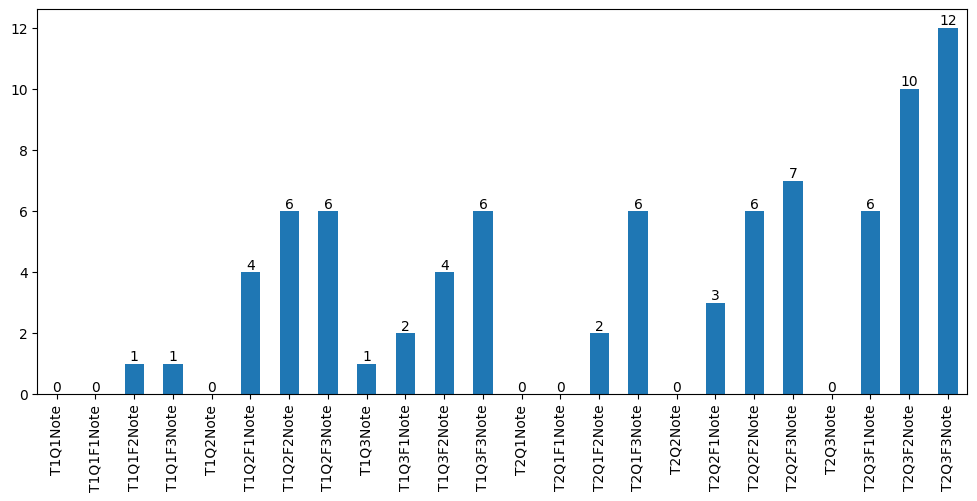

In [58]:
ax = my_count(data_skip[data_skip.variant=='ai'])[11:].plot.bar(figsize=(12,5))
_ = ax.bar_label(ax.containers[0])

## Sentiment

In [59]:
data_sent = getInfo(data, SENTIMENT)

In [60]:
my_count(data_sent[data_sent.variant=='ai'], bins=[-1, 0, 1])

All notes                      [184, 779, 117]
All task notes                 [177, 429, 114]
All pre notes                      [0, 240, 0]
All post notes                     [7, 110, 3]
All base notes                   [59, 173, 38]
All follow-up notes             [125, 606, 79]
All base task notes               [55, 89, 36]
All follow-up task notes        [122, 340, 78]
First follow-up task notes        [56, 94, 30]
Second follow-up task notes      [32, 122, 26]
Third follow-up task notes       [34, 124, 22]
T1Q1Note                            [8, 8, 14]
T1Q1F1Note                         [13, 2, 15]
T1Q1F2Note                          [20, 2, 8]
T1Q1F3Note                          [19, 2, 9]
T1Q2Note                           [11, 5, 14]
T1Q2F1Note                         [17, 2, 11]
T1Q2F2Note                          [21, 2, 7]
T1Q2F3Note                          [21, 1, 8]
T1Q3Note                           [15, 4, 11]
T1Q3F1Note                         [16, 4, 10]
T1Q3F2Note   

In [61]:
my_chi([
    [89, 36, 55],
    [94, 30, 56],
    [122, 26, 32],
    [124, 22, 34]
])

----> pvalue: 0.0003982786868675489

stat = 24.638507493101606, df = 6
data
[[89, 36, 55], [94, 30, 56], [122, 26, 32], [124, 22, 34]]
expected frequencies:
[[107.25  28.5   44.25]
 [107.25  28.5   44.25]
 [107.25  28.5   44.25]
 [107.25  28.5   44.25]]

n=720
Post-hoc testing:
([89, 36, 55], [94, 30, 56])              0.9691108623689708                   0
([89, 36, 55], [122, 26, 32])           0.005246801832909417                   1
([89, 36, 55], [124, 22, 34])           0.005246801832909417                   1
([94, 30, 56], [122, 26, 32])           0.006243966939420857                   1
([94, 30, 56], [124, 22, 34])           0.006243966939420857                   1
([122, 26, 32], [124, 22, 34])            0.9691108623689708                   0





In [62]:
my_count(data_sent[data_sent.variant=='no-ai'], bins=[-1, 0, 1])

All notes                      [61, 179, 30]
All task notes                  [61, 90, 29]
All pre notes                     [0, 60, 0]
All post notes                    [0, 29, 1]
All base notes                 [61, 179, 30]
All follow-up notes                [0, 0, 0]
All base task notes             [61, 90, 29]
All follow-up task notes           [0, 0, 0]
First follow-up task notes         [0, 0, 0]
Second follow-up task notes        [0, 0, 0]
Third follow-up task notes         [0, 0, 0]
T1Q1Note                          [8, 6, 16]
T1Q1F1Note                         [0, 0, 0]
T1Q1F2Note                         [0, 0, 0]
T1Q1F3Note                         [0, 0, 0]
T1Q2Note                          [23, 1, 6]
T1Q2F1Note                         [0, 0, 0]
T1Q2F2Note                         [0, 0, 0]
T1Q2F3Note                         [0, 0, 0]
T1Q3Note                         [19, 1, 10]
T1Q3F1Note                         [0, 0, 0]
T1Q3F2Note                         [0, 0, 0]
T1Q3F3Note

In [63]:
data_sent['meanBase'] = data_sent[base_task_note_columns].mean(axis=1)
data_sent[['variant', 'meanBase']].groupby('variant').agg(['mean', 'std'])

meanBase          
             mean       std
variant                    
ai      -0.105556  0.418635
no-ai   -0.177778  0.352694

In [64]:
my_mannwhitney(data_sent, ['meanBase'], 'variant', ['no-ai', 'ai'])

,Property,U,z,p,r,significant
0,meanBase,401.5,-0.71,0.474,-0.09,False


In [65]:
data_sent['followup1'] = data_sent[follow_up_1_columns].sum(axis=1)
data_sent['followup2'] = data_sent[follow_up_2_columns].sum(axis=1)
data_sent['followup3'] = data_sent[follow_up_3_columns].sum(axis=1)
data_sent[['variant', 'followup1', 'followup2', 'followup3']].groupby('variant').agg(['mean', 'std'])

followup1           followup2           followup3          
             mean       std      mean       std      mean       std
variant                                                            
ai      -0.866667  2.096521 -0.233333  1.924136 -0.433333  1.735697
no-ai    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

In [66]:
x = my_count(data_sent[data_sent.variant=='no-ai'], [-1, 0, 1])[11:].map(lambda x: x[0])
x.interpolate(method='linear')

T1Q1Note       8
T1Q1F1Note     0
T1Q1F2Note     0
T1Q1F3Note     0
T1Q2Note      23
T1Q2F1Note     0
T1Q2F2Note     0
T1Q2F3Note     0
T1Q3Note      19
T1Q3F1Note     0
T1Q3F2Note     0
T1Q3F3Note     0
T2Q1Note       7
T2Q1F1Note     0
T2Q1F2Note     0
T2Q1F3Note     0
T2Q2Note      18
T2Q2F1Note     0
T2Q2F2Note     0
T2Q2F3Note     0
T2Q3Note      15
T2Q3F1Note     0
T2Q3F2Note     0
T2Q3F3Note     0
dtype: int64

<Axes: >

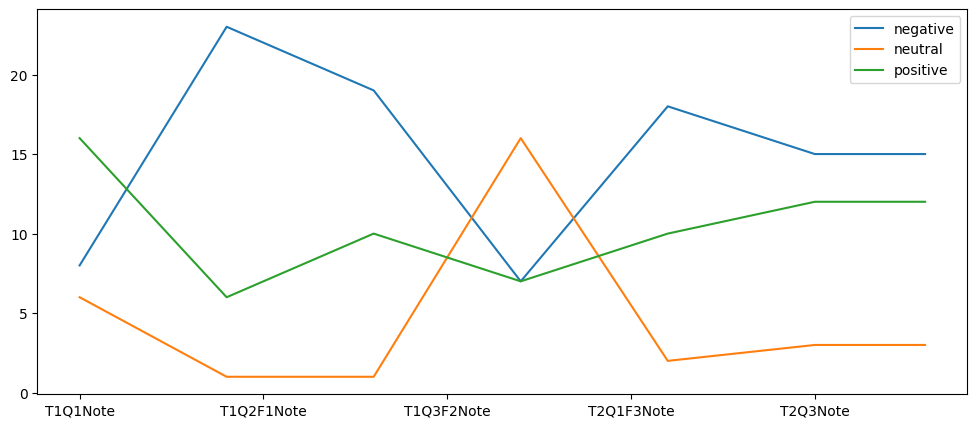

In [67]:
pd.DataFrame({
    'negative' : my_count(data_sent[data_sent.variant=='no-ai'], [-1, 0, 1])[11:].map(lambda x: x[0]).map(lambda x: np.nan if x == 0 else x).interpolate(),
    'neutral' : my_count(data_sent[data_sent.variant=='no-ai'], [-1, 0, 1])[11:].map(lambda x: x[1]).map(lambda x: np.nan if x == 0 else x).interpolate(),
    'positive' : my_count(data_sent[data_sent.variant=='no-ai'], [-1, 0, 1])[11:].map(lambda x: x[2]).map(lambda x: np.nan if x == 0 else x).interpolate(),
}).plot.line(figsize=(12,5))

<Axes: >

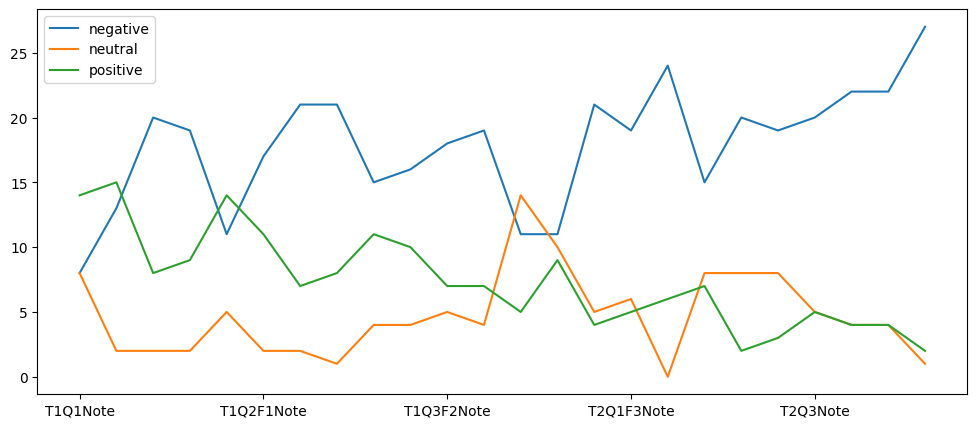

In [68]:
pd.DataFrame({
    'negative' : my_count(data_sent[data_sent.variant=='ai'], [-1, 0, 1])[11:].map(lambda x: x[0]),
    'neutral' : my_count(data_sent[data_sent.variant=='ai'], [-1, 0, 1])[11:].map(lambda x: x[1]),
    'positive' : my_count(data_sent[data_sent.variant=='ai'], [-1, 0, 1])[11:].map(lambda x: x[2]),
}).plot.line(figsize=(12,5))

<Axes: >

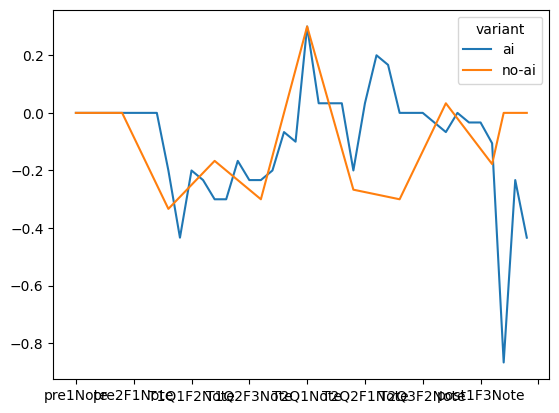

In [69]:
data_sent.groupby('variant').mean().transpose().iloc[1:,:].interpolate(method='linear').plot()

## Topic

In [70]:
data_topic = getInfo(data, TOPIC)

In [71]:
data_topic_gruped_ai = pd.DataFrame({
    'action' : data_topic[data_topic.variant=='ai'].iloc[:,10:34].map(lambda x: True if 0 in x else False).sum(),
    'impression' : data_topic[data_topic.variant=='ai'].iloc[:,10:34].map(lambda x: True if 1 in x else False).sum(),
    'observation' : data_topic[data_topic.variant=='ai'].iloc[:,10:34].map(lambda x: True if 2 in x else False).sum(),
    'proposition' : data_topic[data_topic.variant=='ai'].iloc[:,10:34].map(lambda x: True if 3 in x else False).sum(),
    'explanation' : data_topic[data_topic.variant=='ai'].iloc[:,10:34].map(lambda x: True if 4 in x else False).sum(),
    'knowledge' : data_topic[data_topic.variant=='ai'].iloc[:,10:34].map(lambda x: True if 5 in x else False).sum(),
})
print(data_topic_gruped_ai.transpose()[base_task_note_columns].sum().sum() / len(base_task_note_columns))
print(data_topic_gruped_ai.transpose()[follow_up_task_columns].sum().sum() / len(follow_up_task_columns))

17.833333333333332
8.944444444444445


<Axes: >

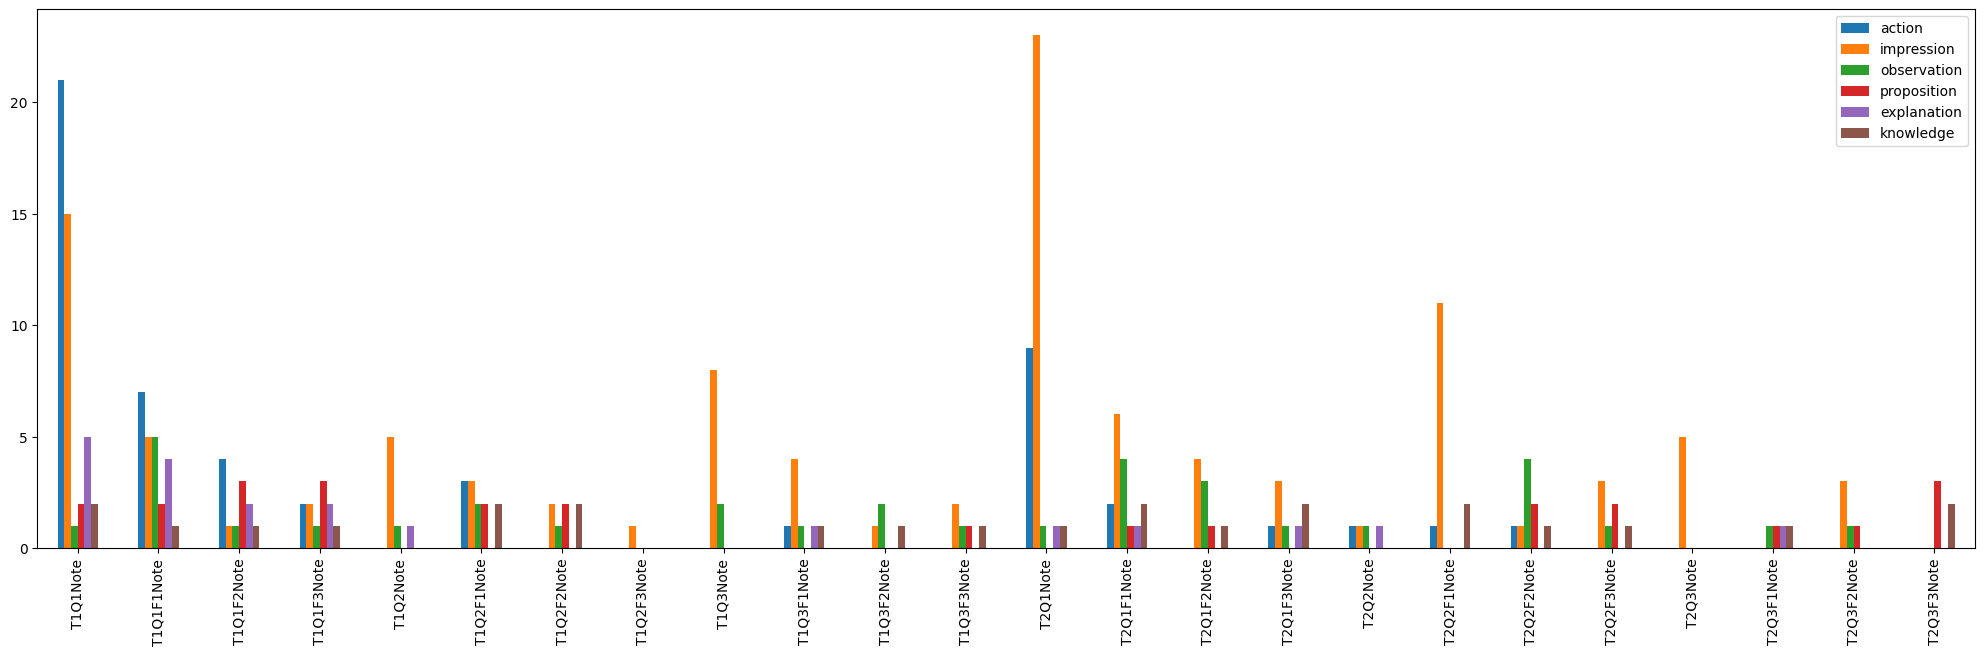

In [72]:
data_topic_gruped_ai.plot.bar(figsize=(25,7))

<Axes: >

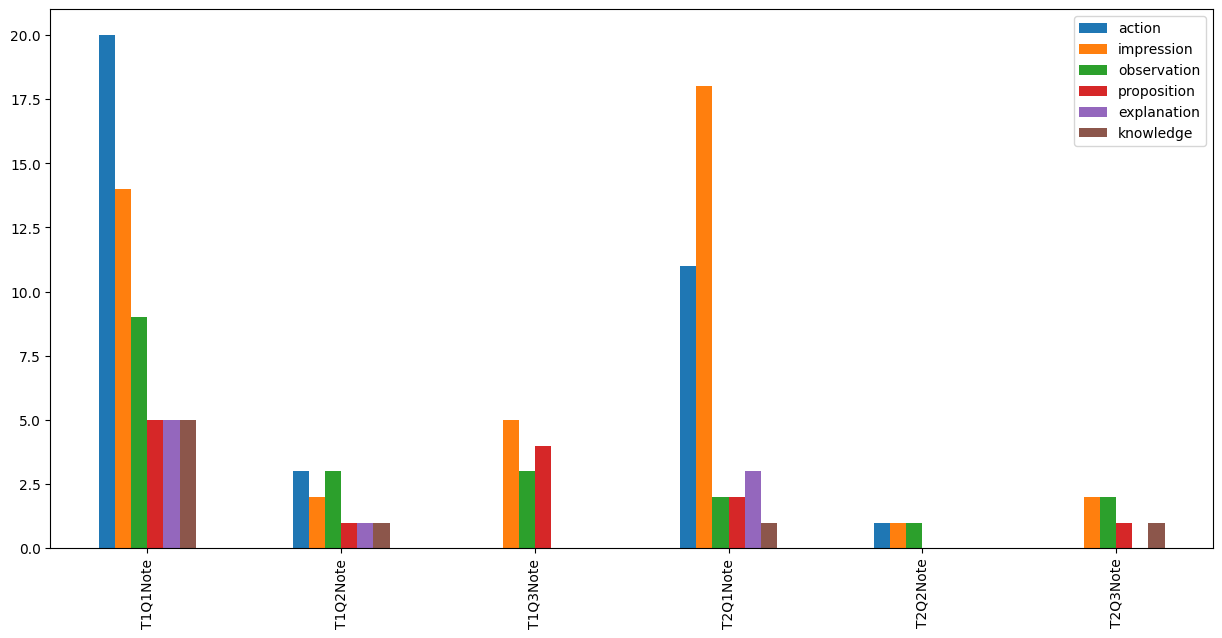

In [73]:
pd.DataFrame({
    'action' : data_topic[data_topic.variant=='no-ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 0 in x else False).sum(),
    'impression' : data_topic[data_topic.variant=='no-ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 1 in x else False).sum(),
    'observation' : data_topic[data_topic.variant=='no-ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 2 in x else False).sum(),
    'proposition' : data_topic[data_topic.variant=='no-ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 3 in x else False).sum(),
    'explanation' : data_topic[data_topic.variant=='no-ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 4 in x else False).sum(),
    'knowledge' : data_topic[data_topic.variant=='no-ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 5 in x else False).sum(),
}).plot.bar(figsize=(15,7))

<Axes: >

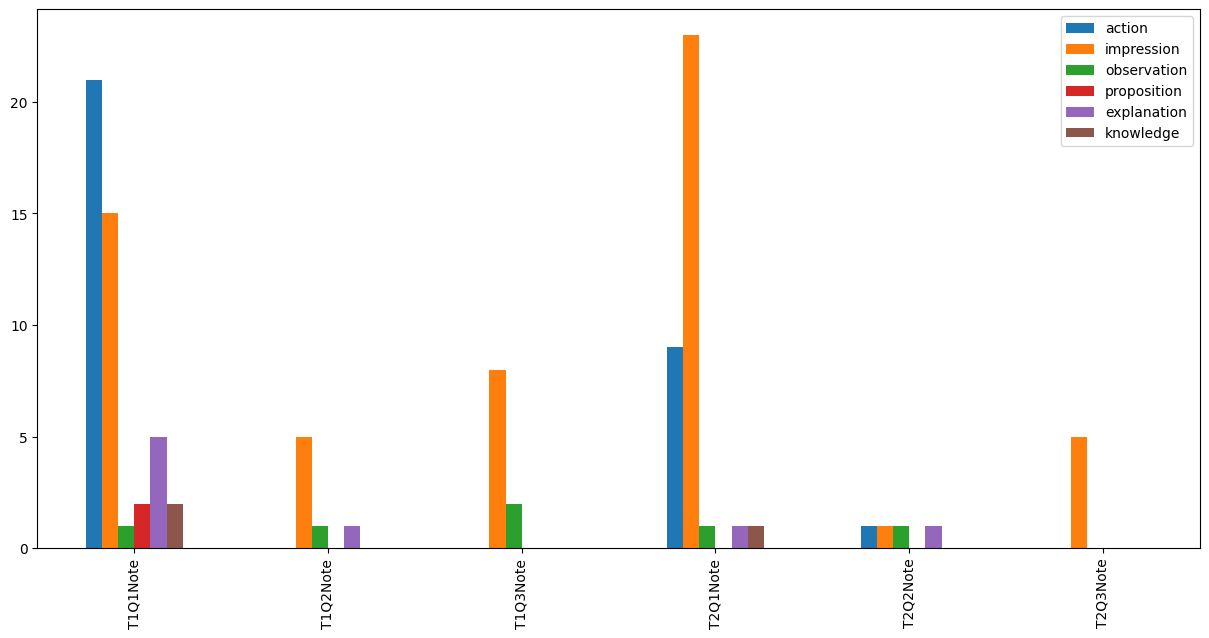

In [74]:
pd.DataFrame({
    'action' : data_topic[data_topic.variant=='ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 0 in x else False).sum(),
    'impression' : data_topic[data_topic.variant=='ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 1 in x else False).sum(),
    'observation' : data_topic[data_topic.variant=='ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 2 in x else False).sum(),
    'proposition' : data_topic[data_topic.variant=='ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 3 in x else False).sum(),
    'explanation' : data_topic[data_topic.variant=='ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 4 in x else False).sum(),
    'knowledge' : data_topic[data_topic.variant=='ai'].iloc[:, [10, 14, 18, 22, 26, 30]].map(lambda x: True if 5 in x else False).sum(),
}).plot.bar(figsize=(15,7))

## Unrelated

In [75]:
data_unrelated = getInfo(data, UNRELATED)

In [76]:
my_count(data_unrelated[data_unrelated.variant=='ai'])

All notes                      16
All task notes                 16
All pre notes                   0
All post notes                  0
All base notes                  0
All follow-up notes            16
All base task notes             0
All follow-up task notes       16
First follow-up task notes      1
Second follow-up task notes     6
Third follow-up task notes      9
T1Q1Note                        0
T1Q1F1Note                      1
T1Q1F2Note                      3
T1Q1F3Note                      2
T1Q2Note                        0
T1Q2F1Note                      0
T1Q2F2Note                      1
T1Q2F3Note                      2
T1Q3Note                        0
T1Q3F1Note                      0
T1Q3F2Note                      1
T1Q3F3Note                      1
T2Q1Note                        0
T2Q1F1Note                      0
T2Q1F2Note                      0
T2Q1F3Note                      2
T2Q2Note                        0
T2Q2F1Note                      0
T2Q2F2Note    

## Not generated

In [79]:
data_not_generated = getInfo(data, NO_QUESTION)

In [80]:
my_count(data_not_generated[data_not_generated.variant=='ai'])

All notes                      135
All task notes                  64
All pre notes                    0
All post notes                  71
All base notes                   2
All follow-up notes            133
All base task notes              0
All follow-up task notes        64
First follow-up task notes       7
Second follow-up task notes     22
Third follow-up task notes      35
T1Q1Note                         0
T1Q1F1Note                       0
T1Q1F2Note                       1
T1Q1F3Note                       1
T1Q2Note                         0
T1Q2F1Note                       2
T1Q2F2Note                       6
T1Q2F3Note                       6
T1Q3Note                         0
T1Q3F1Note                       1
T1Q3F2Note                       3
T1Q3F3Note                       6
T2Q1Note                         0
T2Q1F1Note                       0
T2Q1F2Note                       0
T2Q1F3Note                       5
T2Q2Note                         0
T2Q2F1Note          